In [8]:
import os 
import shutil 
import random 
import pandas as pd 

l=[]
for i in os.listdir("D:/cat_id/test/yolo_test/labels"):
    l.append(i)
ca=0
random.shuffle(l)
for i in l:
    try:
        l1=pd.read_csv(f"D:/cat_id/test/yolo_test/labels/{i}",header=None,sep=" ")
        if l1.iloc[0].values[0]==0:
            shutil.copy(f"D:/cat_id/test/yolo_test/labels/{i}","test_labels/")
            ca=ca+1
    except:
        c=0
    if ca>=750:
        break 
for i in os.listdir("test_labels/"):
    j=i.split(".tx")[0]
    try:
        shutil.copy(f"D:/cat_id/test/yolo_test/images/{j}.jpg","test_images/")
    except:
        shutil.copy(f"D:/cat_id/test/yolo_test/images/{j}.png","test_images/")


In [207]:
from rembg import remove 
import cv2
import matplotlib.pyplot as plt 
import numpy as np 
from PIL import Image, ImageFilter
for i in os.listdir("cats/"):
    if ".jp" in i:
        j=i.split(".jp")[0]
        frame=cv2.imread(f"cats/{i}")
        reduced_factor=0.45
        frame=cv2.convertScaleAbs(frame, alpha=reduced_factor, beta=0)
        output=remove(frame)
        output1=Image.fromarray(output)
        shadow = output.copy()
        shadow = Image.fromarray(output)
        shadow = shadow.filter(ImageFilter.GaussianBlur(radius=4))
        shadow_data = shadow.getdata()
        shadow_data = [(r, g, b, int(a)) for r, g, b, a in shadow_data]
        shadow.putdata(shadow_data)
        output1.paste(shadow, (0, 0), shadow)
        output=shadow
        background = Image.new("RGB", output.size, (255, 255, 255))
        background.paste(output, mask=output.split()[3]) # 3 is the alpha channel
        background.save(f'D:/cat_id/test/bg_removal/dark_and_blur/{j}_bg_dark_blur.jpg', 'JPEG', quality=80)
        # img=cv2.imread("cat_6_bg.jpg")
        # output=cv2.convertScaleAbs(img, alpha=reduced_factor, beta=0)
        # plt.imshow(img)
    else:
        j=i.split(".pn")[0]
        frame=cv2.imread(f"cats/{i}")
        reduced_factor=0.45
        frame=cv2.convertScaleAbs(frame, alpha=reduced_factor, beta=0)
        output=remove(frame)
        output1=Image.fromarray(output)
        shadow = output.copy()
        shadow = Image.fromarray(output)
        shadow = shadow.filter(ImageFilter.GaussianBlur(radius=4))
        shadow_data = shadow.getdata()
        shadow_data = [(r, g, b, int(a)) for r, g, b, a in shadow_data]
        shadow.putdata(shadow_data)
        output1.paste(shadow, (0, 0), shadow)
        output=shadow
        background = Image.new("RGB", output.size, (255, 255, 255))
        background.paste(output, mask=output.split()[3]) # 3 is the alpha channel
        background.save(f'D:/cat_id/test/bg_removal/dark_and_blur/{j}_bg_dark_blur.jpg', 'JPEG', quality=80)
        # img=cv2.imread("cat_6_bg.jpg")
        # output=cv2.convertScaleAbs(img, alpha=reduced_factor, beta=0)
        # plt.imshow(img)

In [13]:
for i in os.listdir("dark_blur_test_images"):
    j=i.split("_bg_dark_blur")[0]
    shutil.copy(f"test_labels/{j}.txt",f"dark_blur_test_labels/{j}_bg_dark_blur.txt")

In [14]:
for i in os.listdir("nyt_vision_images"):
    j=i.split("_night")[0]
    shutil.copy(f"test_labels/{j}.txt",f"nyt_vision_labels/{j}_night.txt")

In [119]:
c=0
for i in os.listdir("D:/cat_id/yolov5/runs/detect/exp17/labels"):
    if ".txt" in i:
        l=pd.read_csv(f"D:/cat_id/yolov5/runs/detect/exp17/labels/{i}",header=None,sep=" ")
        if l.iloc[0].values[0]==0:
            c=c+1

In [120]:
c

56

In [34]:
import os 
c=0
for i in os.listdir("D:/cat_id/deep_dive/2610/bg_removal_black_dark_blur_labels"):
    l=pd.read_csv(f"D:/cat_id/deep_dive/2610/bg_removal_black_dark_blur_labels/{i}",header=None,sep=" ")
    c=c+1
    if l.iloc[0].values[0]!=0:
        print(i)

black American Ringtail cat__10_bg_dark_blur.txt
black Bambino cat__30_bg_dark_blur.txt
black Ragamuffin cat__13_bg_dark_blur.txt
black Selkirk Rex cat__11_bg_dark_blur.txt
black Selkirk Rex cat__25_bg_dark_blur.txt
black Snowshoe cat__39_bg_dark_blur.txt
black Somali cat cat__24_bg_dark_blur.txt


In [33]:
c

726

In [41]:
import os 
c=0
for i in os.listdir("D:/cat_id/yolov5/runs/detect/exp3/labels"):
    if ".txt" in i:
        l=pd.read_csv(f"D:/cat_id/yolov5/runs/detect/exp3/labels/{i}",header=None,sep=" ")
        if l.iloc[0].values[0]==0:
            c=c+1
print(c)

28


In [153]:
import pandas as pd 
df=pd.read_excel("D:/cat_id/deep_dive/0211/blur_dark_28.xlsx")
df.head()

,Image,detections,IOU,Confidence,o_class,p_class
0,00000001_012,1,0.83,0.89,0,0
1,00000001_027,1,0.95,0.90,0,0
2,00000001_029,1,0.96,0.93,0,0
3,00000003_009,1,0.96,0.92,0,0
4,00000004_003,1,0.92,0.92,0,0


<Axes: xlabel='Confidence', ylabel='Count'>

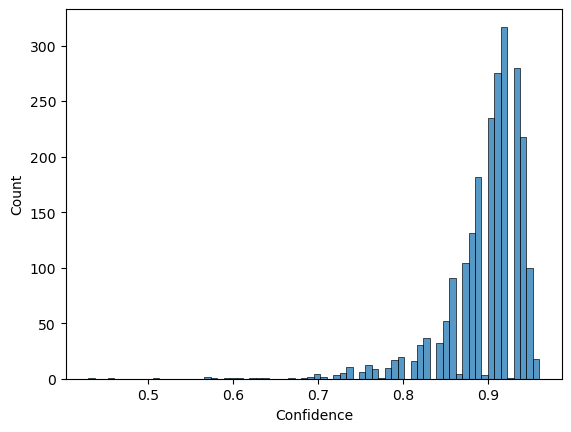

In [154]:
import seaborn as sns 
cat_df=df[df["o_class"]==0]
sns.histplot(cat_df["Confidence"])

In [107]:
import pandas as pd 
df=pd.read_excel("D:/cat_id/deep_dive/0911/dark_blur_50_final.xlsx")
df.head()

,Image,detections,IOU,Confidence,o_class,p_class
0,00000001_012,1,0.83,0.90,0,0
1,00000001_027,1,0.90,0.87,0,0
2,00000001_029,1,0.95,0.92,0,0
3,00000003_009,1,0.92,0.92,0,0
4,00000004_003,1,0.90,0.91,0,0


<Axes: xlabel='Confidence', ylabel='Count'>

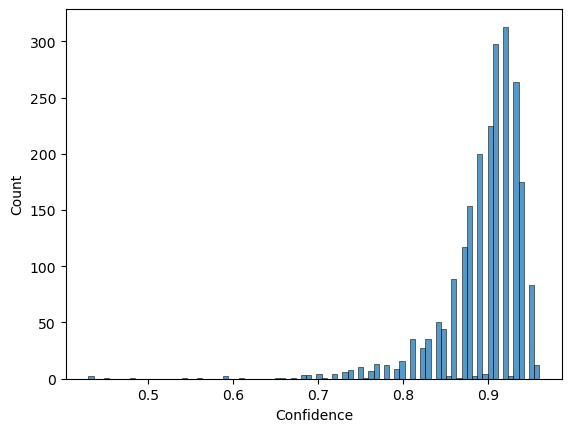

In [108]:
import seaborn as sns 
cat_df=df[df["o_class"]==0]
sns.histplot(cat_df["Confidence"])

<Axes: xlabel='Confidence', ylabel='Count'>

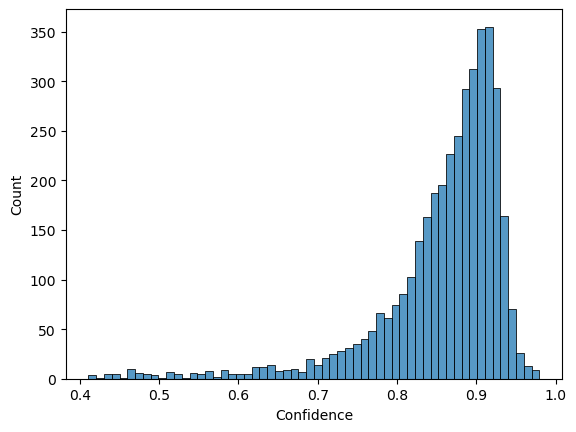

In [392]:
import pandas as pd 
df=pd.read_excel("D:/cat_id/deep_dive/0911/old_model_new_val.xlsx")
df["Confidence"]=df["conf_score"]
import seaborn as sns 
cat_df=df[df["orig_class"]==0]
sns.histplot(cat_df["Confidence"])

In [393]:
l=[]
l.append(len(cat_df[cat_df["Confidence"]>=0.9]))
for i in [0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2]:
    l.append(len(cat_df[(cat_df["Confidence"]<i) & (cat_df["Confidence"]>=i-0.1)]))
l.append(len(cat_df[cat_df["Confidence"]<0.1]))
len(l)

10

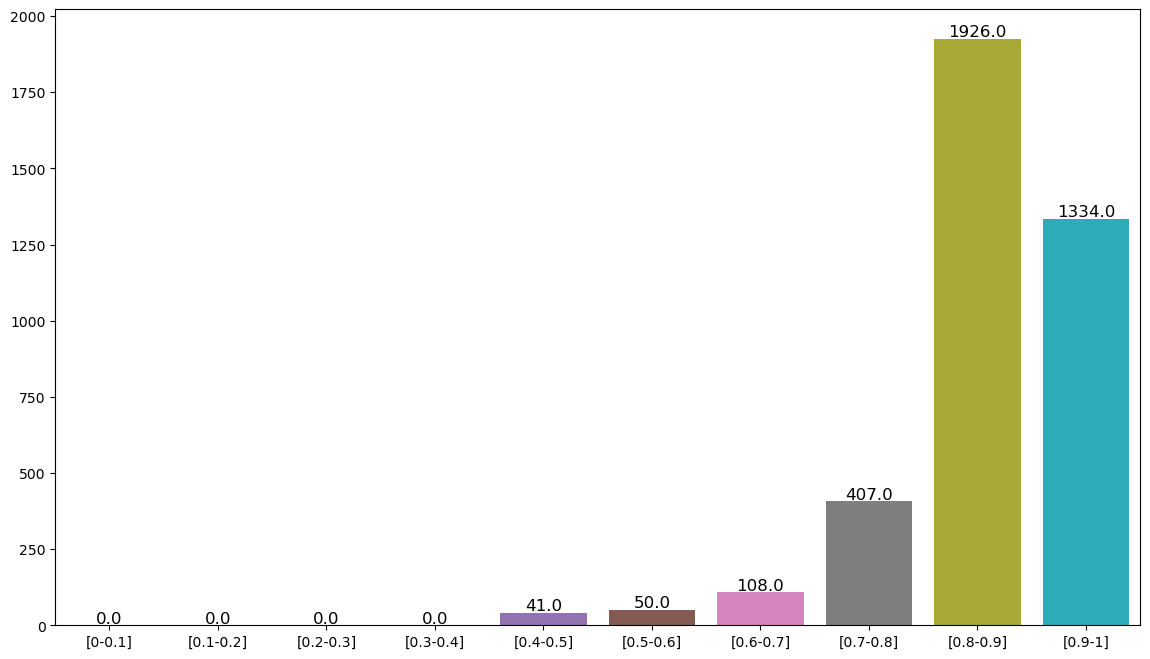

In [394]:
import matplotlib.pyplot as plt
l=l[::-1]
plt.figure(figsize=(14,8))
ax=sns.barplot(x=["[0-0.1]","[0.1-0.2]","[0.2-0.3]","[0.3-0.4]","[0.4-0.5]","[0.5-0.6]","[0.6-0.7]","[0.7-0.8]","[0.8-0.9]","[0.9-1]"],y=l)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

In [111]:
import pandas as pd 
df=pd.read_excel("D:/cat_id/deep_dive/2610/black_cat_model_prev.xlsx")
df.head()

,Image,detections,IOU,Confidence,o_class,p_class
0,00000001_012,1,0.84,0.88,0,0
1,00000001_027,1,0.93,0.90,0,0
2,00000001_029,1,0.94,0.92,0,0
3,00000003_009,1,0.91,0.93,0,0
4,00000004_003,1,0.88,0.90,0,0


<Axes: xlabel='Confidence', ylabel='Count'>

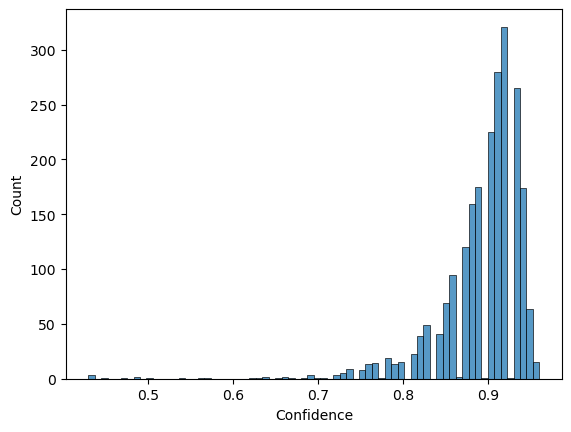

In [112]:
import seaborn as sns 
cat_df=df[df["o_class"]==0]
sns.histplot(cat_df["Confidence"])

In [11]:
import os
import pandas as pd 
c=0
for i in os.listdir("D:/cat_id/yolov5_training_sharing/runs/detect/exp31/labels"):
    if ".txt" in i:
        l=pd.read_csv(f"D:/cat_id/yolov5_training_sharing/runs/detect/exp31/labels/{i}",header=None,sep=" ")
        if l.iloc[0].values[0]==0:
            if (l.iloc[0].values[5]>=0.8) & (l.iloc[0].values[5]<0.9):
                c=c+1
c

10

In [8]:
import os
import pandas as pd 
c=0
for i in os.listdir("D:/cat_id/yolov5_training_sharing/runs/detect/exp31/labels"):
    if ".txt" in i:
        l=pd.read_csv(f"D:/cat_id/yolov5_training_sharing/runs/detect/exp31/labels/{i}",header=None,sep=" ")
        if l.iloc[0].values[0]==0:
            if (l.iloc[0].values[5]>=0.9):
                c=c+1
c

0

In [3]:
import os
import pandas as pd 
c=0
for i in os.listdir("D:/cat_id/yolov5_training_sharing/runs/detect/exp31/labels"):
    if ".txt" in i:
        l=pd.read_csv(f"D:/cat_id/yolov5_training_sharing/runs/detect/exp31/labels/{i}",header=None,sep=" ")
        if l.iloc[0].values[0]==0:
            c=c+1
c

90

In [59]:
import os 
import shutil
for i in os.listdir("D:/cat_id/yolov5/runs/detect/exp25/labels"):
    if "jpg" in i:
        if "no_plot" in i:
            shutil.copy(f"D:/cat_id/yolov5/runs/detect/exp14/labels/{i}","D:/cat_id/deep_dive/0911/detected_frames/Cat_110_Side_Eating_first_part/no_plot")
        else:
            shutil.copy(f"D:/cat_id/yolov5/runs/detect/exp14/labels/{i}","D:/cat_id/deep_dive/0911/detected_frames/Cat_110_Side_Eating_first_part/plot")

In [232]:
import pandas as pd 
df=pd.read_csv("select_touchpoints.csv")
df.head()

,node_seq,node_id,parent_node_id,level,node_display_name,path,node_description,node_name,version_id,new_level,leaf_nodes
0,2001,2001,0,Level 1,Marketing,Marketing,Marketing,NaN,1,NaN,"['M_PS_BUT_SP', 'M_PA_BUT_SP', 'M_MA_AND_SP', ..."
1,2002,2002,2001,Level 2,Audio,Marketing>Audio,Audio,NaN,1,NaN,['M_AU_POD_SP']
2,2003,2003,2002,Variable,Audio Podcast,Marketing>Audio>Podcast,Audio Podcast,M_AU_POD_SP,1,audio podcast,['M_AU_POD_SP']
3,2004,2004,2001,Level 2,Display,Marketing>Display,Display,NaN,1,NaN,['M_DISP_DISP_SP']
4,2005,2005,2004,Variable,Display,Marketing>Display>Display,Display,M_DISP_DISP_SP,1,display,['M_DISP_DISP_SP']


In [248]:
df[df["node_display_name"]=="External Factors"]

,node_seq,node_id,parent_node_id,level,node_display_name,path,node_description,node_name,version_id,new_level,leaf_nodes
54,2055,6000,0,Level 1,External Factors,External Factors,External Factors,NaN,1,NaN,"['E_OECD_ECO_IND', 'E_UNEM_RTE', 'E_CPI_FOOD_A..."


In [247]:
def fla(x):
    if "Control" in x:
        return x.replace("Control","External Factors")
    return x 
df["path"]=df["path"].apply(fla)

In [249]:
df.to_csv("select_touchpoints1.csv")

In [206]:
import os 
import shutil 
c=0
for i in os.listdir("CATS_DOGS/train/DOG/"):
    shutil.copy(f"CATS_DOGS/train/DOG/{i}",f"D:/cat_id/test/new_val/images/dog_{c}.jpg")
    c=c+1
    if c==4000:
        break

In [250]:
df=pd.read_csv("scenario_data_qtrly (10).csv")
df1=pd.read_csv("spend_threshold_quarterly.csv")
df.head()

,Variable Name,Variable Description,Q1,Q2,Q3,Q4
0,M_AU_POD_SP,Audio Podcast,0,0,0,0
1,M_DISP_DISP_SP,Display,0,0,0,0
2,M_MA_AND_SP,Mobile App - Android,0,0,0,0
3,M_MA_IOS_SP,Mobile App - iOS,0,0,0,0
4,M_OV_OV_SP,Online Video_Online Video,0,0,0,0


In [251]:
df1.head()

,Unnamed: 0,node_name,q1,q2,q3,q4
0,0,M_AU_POD_SP,4.082750e+05,5.959652e+05,1.055250e+05,1.241713e+06
1,1,M_DISP_DISP_SP,3.140437e+05,2.021120e+05,1.083291e+05,6.498469e+05
2,2,M_MA_AND_SP,1.917987e+05,2.850271e+05,2.292385e+05,6.254737e+05
3,3,M_MA_IOS_SP,1.405365e+06,1.127392e+06,1.063249e+06,3.287527e+06
4,4,M_OV_OV_SP,2.279359e+06,2.299995e+05,1.896084e+04,9.162417e+05


In [254]:
pd.merge(df,df1,left_on="Variable Name",right_on="node_name",how="inner").to_csv("scenario_qtr.csv")

In [255]:
l=[]
for i in os.listdir("D:/cat_id/yolov5/runs/detect/exp20"):
    l.append(i)

In [257]:
for i in os.listdir("D:/cat_id/test/new_val/images"):
    if i not in l:
        os.remove(f"D:/cat_id/test/new_val/images/{i}")

In [305]:
l=[]
for i in os.listdir("D:/cat_id/yolov5/runs/detect/exp23/labels"):
    l1=[]
    l1.append(i.split(".tx")[0])
    a=pd.read_csv(f"D:/cat_id/yolov5/runs/detect/exp23/labels/{i}",header=None,sep=" ")
    if len(a)>1:
        pred=0
        pred_conf=0
        for j in range(len(a)):
            if a.iloc[j].values[5]>pred_conf:
                pred_conf=a.iloc[j].values[5]
                pred=a.iloc[j].values[0]
    else:
        pred=a.iloc[0].values[0]
        pred_conf=a.iloc[0].values[5]
    l1.append(pred)
    l1.append(pred_conf)
    l.append(l1)

In [306]:
df=pd.DataFrame(data=l,columns=["name","pred_class","conf_score"])

In [307]:
l=[]
for i in os.listdir("D:/cat_id/yolov5/runs/detect/exp23/labels"):
    l.append(i.split(".tx")[0])
l1=[]
for i in os.listdir("D:/cat_id/test/new_val/images"):
    if "jpg" in i:
        j=i.split(".jp")[0]
        if j not in l:
            l1.append([j,2,"NA"])
    elif "pn" in i:
        j=i.split(".jp")[0]
        if j not in l:
            l1.append([j,2,"NA"])
    else:
        print(i)

In [308]:
df2=pd.DataFrame(data=l1,columns=["name","pred_class","conf_score"])

In [309]:
df=pd.concat([df,df2]).reset_index().drop("index",axis=1)

In [310]:
df["orig_class"]=df["name"].apply(lambda x:0 if "cat" in x else (1 if "dog" in x else 2))

In [311]:
from sklearn.metrics import confusion_matrix,classification_report 
print(classification_report(df["orig_class"],df["pred_class"]))
print(confusion_matrix(df["orig_class"],df["pred_class"]))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      3996
           1       0.98      0.94      0.96      3954
           2       0.77      0.91      0.84      1265

    accuracy                           0.94      9215
   macro avg       0.91      0.94      0.92      9215
weighted avg       0.95      0.94      0.95      9215

[[3809   57  130]
 [   3 3734  217]
 [  78   30 1157]]


In [312]:
df.to_excel("old_model_new_val.xlsx")

C:\Users\uday.bijjala\AppData\Local\Temp\ipykernel_18096\4179771103.py:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  df.to_excel("old_model_new_val.xlsx")


In [287]:
a=df[(df["orig_class"]==1) & (df["pred_class"]==0)]
for i in a["name"].values:
    shutil.copy(f"D:/cat_id/test/new_val/images/{i}.jpg","new_val_misclassification_analysis/dog_as_cat/")

In [288]:
df

,name,pred_class,conf_score,orig_class
0,cat_0,0.0,0.832763,0
1,cat_1,0.0,0.928345,0
2,cat_10,0.0,0.871131,0
3,cat_100,0.0,0.836495,0
4,cat_1000,0.0,0.871016,0
...,...,...,...,...
7945,dog_933,2.0,NA,1
7946,dog_936,2.0,NA,1
7947,dog_948,2.0,NA,1
7948,dog_955,2.0,NA,1


In [353]:
df=pd.read_csv("scenario_data_yearly (9).csv")
df1=pd.read_csv("yearly spends.csv")

In [357]:
pd.merge(df,df1,left_on="Variable Name",right_on="Variable Name",how="inner").to_csv("scenario_data_yearly.csv")

In [355]:
df1.head()

,Variable Name,Variable Description,Year,Unnamed: 3
0,M_AU_POD_SP,Audio Podcast,1.351166e+06,1.351166e+06
1,M_DISP_DISP_SP,Display,2.094786e+05,2.094786e+05
2,M_FLAGS_HOLI,Holidays,0.000000e+00,0.000000e+00
3,M_FLAGS_LVN,Livenation,0.000000e+00,0.000000e+00
4,M_MA_AND_SP,Mobile App - Android,3.268185e+05,3.268185e+05


In [358]:
df.head()

,Variable Name,Variable Description,Year
0,M_AU_POD_SP,Audio Podcast,0
1,M_DISP_DISP_SP,Display,0
2,M_MA_AND_SP,Mobile App - Android,0
3,M_MA_IOS_SP,Mobile App - iOS,0
4,M_OV_OV_SP,Online Video_Online Video,0


In [423]:
d=dict()
d.get("a")